# Teste Técnico para Ciência de Dados da Keyrus

## 1ª parte: Análise Exploratória

- [x] Tipos de variáveis
- [x] Medidas de posição
- [x] Medidas de dispersão
- [x] Tratamento de Missing Values
- [x] Gráficos
- [x] Análise de Outliers

## 2ª parte: Estatística

- [x] Estatística descritiva
- [x] Identificação das distribuições das variáveis

## 3ª parte: Modelagem

- [ ] Modelos de previsão
- [ ] Escolha de melhor modelo
- [ ] Avaliação de resultados
- [ ] Métricas

## Imports

In [527]:
# Data analysis and data wrangling
import statistics
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.ensemble import RandomForestClassifier  # enbedded method

# Other
from IPython.display import Image
import configparser
import warnings
import os

## Preparação do Diretório Principal

In [528]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [529]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/challenges/challenge-keyrus'

## Cell Format

In [530]:
config = configparser.ConfigParser()
config.read('src/visualization/plot_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

legend_loc = config['legend']['legend_loc']
legend_fontsize = int(config['legend']['legend_fontsize'])

In [548]:
# matplotlib rcParams
# ===================
plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout


# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

# Legend
plt.rcParams['legend.loc'] = legend_loc
plt.rcParams['legend.fontsize'] = legend_fontsize

In [549]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carregamento dos Dados

In [550]:
%%time

df_callcenter = pd.read_csv('data/cleansing/callcenter_marketing_clenning.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 22.75 ms
Type conversion took: 26.63 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 2.80 ms
Type conversion took: 8.25 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 58.3 ms, sys: 11.8 ms, total: 70.2 ms
Wall time: 67.9 ms


**OBS**: carragamento em quase metade do tempo em relação a versão original do arquivo csv.

## Variáveis Globais

In [551]:
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [552]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [553]:
def get_col_without_target(df: 'dataframe',

                           list_columns: list,
                           target_col: str) -> list:

    col_target = list_columns.copy()
    
    col_target.remove(target_col)
    print(type(col_target))
    
    
    return col_target

In [554]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## Divisão do Dataset
A partir da feature target vou fazer o split dos dataset para analisar estatisticamente.
- `resultado == sim`
- `resultado == nao`

In [555]:
df_resultado_0 = df_callcenter.query('resultado == 0')
df_resultado_0.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0,0,0,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.4,4.86,5191,0
1,57,1,0,1,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.4,4.86,5191,0
2,37,1,0,1,0,1,0,0,5,1,5,0,0,0,0,93.99,-36.4,4.86,5191,0
3,40,2,0,2,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.4,4.86,5191,0
4,56,1,0,1,0,0,1,0,5,1,5,0,0,0,0,93.99,-36.4,4.86,5191,0


In [556]:
df_resultado_1 = df_callcenter.query('resultado == 1')
df_resultado_1.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
75,41,3,2,0,0,1,0,0,5,1,7,0,0,0,0,93.99,-36.4,4.86,5191,1
83,49,10,0,6,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.4,4.86,5191,1
88,49,4,0,3,0,0,0,0,5,1,7,0,0,0,0,93.99,-36.4,4.86,5191,1
129,41,4,0,4,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.4,4.86,5191,1
139,45,3,0,3,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.4,4.86,5191,1


---

## Estatística Descritiva

- Medidas de Tendência Central
- Medidas de Forma
- Medidas de Dispersão 
- Medidas de Relação

In [557]:
df_callcenter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
idade                          41170 non-null int64
profissao                      41170 non-null int64
estado_civil                   41170 non-null int64
educacao                       41170 non-null int64
inadimplente                   41170 non-null int64
emprestimo_moradia             41170 non-null int64
emprestimo_pessoal             41170 non-null int64
meio_contato                   41170 non-null int64
mes                            41170 non-null int64
dia_da_semana                  41170 non-null int64
duracao                        41170 non-null int64
qtd_contatos_campanha          41170 non-null int64
dias_ultimo_contato            41170 non-null int64
qtd_contatos_total             41170 non-null int64
campanha_anterior              41170 non-null int64
indice_precos_consumidor       41170 non-null float64
indice_confianca_consumidor    41170 non-null float64
eur

### Medidas de Tendência Central

In [558]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get summary statistic 
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [559]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0
mean,40.0231,3.61783,0.504834,3.31946,0.000145737,0.547899,0.151761,0.63471,6.60785,2.97967,4.67452,0.362035,0.221326,0.173039,0.169978,93.5752,-40.503,3.6214,5166.85,0.112679
std,10.4204,2.4117,0.688431,2.22745,0.0170722,0.497706,0.358793,0.481517,2.04105,1.41151,0.958243,0.576758,1.34916,0.494996,0.45584,0.579921,4.62781,1.73454,72.3305,0.316204
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,93.08,-42.7,1.34,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,93.75,-41.8,4.86,5191.0,0.0
75%,47.0,4.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,5.0,1.0,0.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,98.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,27.0,7.0,2.0,94.77,-26.9,5.04,5228.0,1.0


In [560]:
show_measures_location(df=df_resultado_0,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0,36531.0
mean,39.9101,3.56984,0.498535,3.28236,0.000164244,0.54592,0.152336,0.609866,6.58079,2.97465,4.56054,0.375079,0.0929074,0.132435,0.126057,93.6032,-40.5934,3.81166,5176.0,0.0
std,9.89671,2.36631,0.690173,2.21637,0.0181237,0.497894,0.359352,0.487787,1.98993,1.41604,0.920593,0.58727,0.897157,0.409284,0.369317,0.560128,4.39065,1.63823,64.6216,0.0
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,93.08,-42.7,1.41,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,93.92,-41.8,4.86,5195.0,0.0
75%,47.0,4.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,5.0,1.0,0.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,95.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,22.0,7.0,2.0,94.77,-26.9,5.04,5228.0,0.0


In [561]:
show_measures_location(df=df_resultado_1,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0,4639.0
mean,40.9123,3.99569,0.55443,3.61155,0.0,0.563484,0.14723,0.830351,6.82087,3.01919,5.57211,0.259323,1.23259,0.492779,0.515844,93.3549,-39.7911,2.12315,5094.81,1.0
std,13.8388,2.71382,0.672571,2.29216,0.0,0.496007,0.354373,0.375364,2.39556,1.37489,0.753264,0.47377,2.94363,0.860406,0.797066,0.677785,6.13966,1.74284,87.7381,0.0
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,1.0
25%,31.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,5.0,0.0,0.0,0.0,0.0,92.89,-46.2,0.85,5017.0,1.0
50%,37.0,3.0,0.0,4.0,0.0,1.0,0.0,1.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,93.2,-40.4,1.27,5099.0,1.0
75%,50.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,6.0,0.0,0.0,1.0,1.0,93.92,-36.1,4.41,5191.0,1.0
max,98.0,11.0,2.0,7.0,0.0,1.0,1.0,1.0,12.0,5.0,8.0,3.0,27.0,6.0,2.0,94.77,-26.9,5.04,5228.0,1.0


#### Notas
- Algo interessante de se observar é que quando temos somente o dataset com resultado positivo, o valor da feature  `inadimplete` é sempre o mesmo.
- Vou explorar melhor essa feature.

#### Reanálise da Feature `inadimplete`

In [562]:
df_resultado_1['inadimplente'].unique()

array([0])

In [563]:
df_callcenter['inadimplente'].unique()

array([0, 2])

In [564]:
len(df_callcenter.query('inadimplente == 2'))

3

- Sempre que há `resultado == POSITIVO` o cliente **não** esta inadimplete.
- Então podemos concluir que não é preciso ligar para clientes que estão na situação de inadimplência.

##### Hipótese
- Testar a **Hipótese:** se feature `inadimplente == 2` então `qtd_contatos_campanha == 0`
  - se hipótese válida, significa que há perda de tempo em ligar para clientes inadimpletes, então são dados de **outliers** e devem ser removidos.

In [565]:
df_hipotese = df_callcenter.query('inadimplente == 2 & qtd_contatos_campanha == 0')
len(df_hipotese)

3

- **Hipótese vadidada.**
- Em todo o dataframe há somente 3 casos de inadimplentes
- Os dados serão removidos.

In [566]:
print(f'Rows before operation = {df_callcenter.shape[0]}')

df_callcenter.drop(df_hipotese.index, inplace=True)

print(f'Rows after operation = {df_callcenter.shape[0]}')

Rows before operation = 41170
Rows after operation = 41167


---

### Medidas de Forma
- Mostram a forma da ditribuição dos dados.
- Identificação das distribuições das variáveis

#### Assimetria dos Dados (skew)
Quanto mais próximo estiver de 0, melhor (normal distribuition).

In [567]:
#  At this point I decided to use dataframe to maintain the same function pattern df.describe()
# However, dictionnaires are more recommended because they are faster in a few data.

def show_measures_shape(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['skew', 'kurtosis'] 
    df_temp = pd.DataFrame(index=[index])
        
    print("-"*25, "MEASURES OF SHAPE", "-"*25, end='\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(df[column].skew())
        list_temp.append(df[column].kurt())
        
        df_temp[column] = list_temp
    
    return df_temp

In [568]:
show_measures_shape(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SHAPE -------------------------


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
skew,0.784771,1.32437,1.01218,-0.0147736,0,-0.192552,1.94114,-0.55943,0.851804,0.00035696,-0.361198,1.46798,7.93743,3.83132,2.737,-0.224567,0.303129,-0.709249,-1.04674,2.44981
kurtosis,0.791959,1.46275,-0.257875,-1.50927,0,-1.96302,1.76812,-1.68712,-0.0273675,-1.29972,0.708049,1.76836,76.3611,20.1007,6.81746,-0.827782,-0.358729,-1.40672,0.00704367,4.00174


#### Análise Gráfica
- Histogramas são mais úteis para encontrar o tipo de distribuição dos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2830f7cbe0>,
      dtype=object)

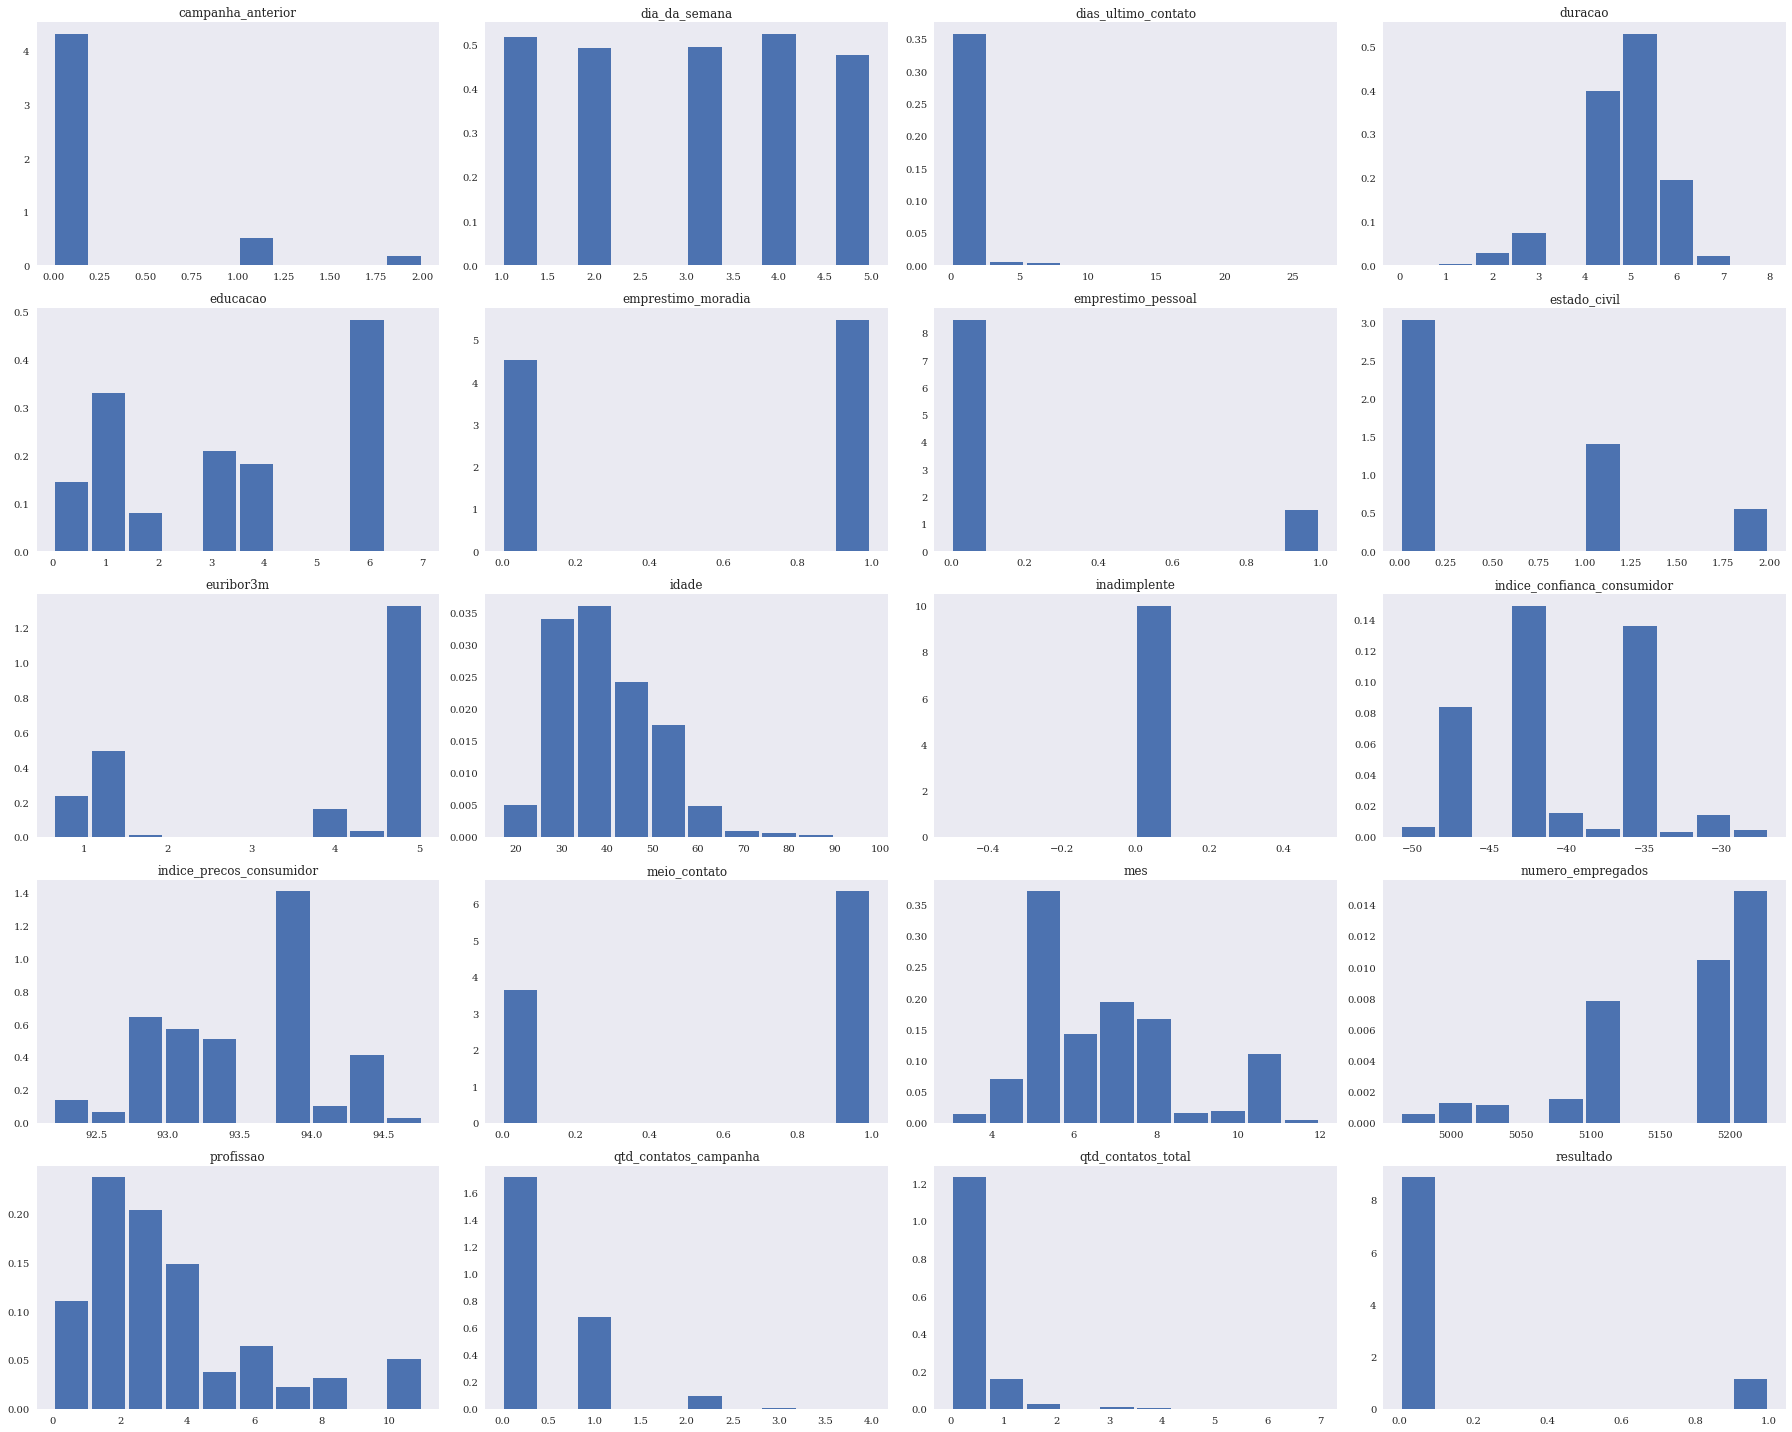

In [569]:
# Distribuition
df_callcenter[list_numerical_col].hist(figsize=[25,20],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9)

#### Notas
- Observando o dataframe gerado é possível notar que algumas features estão muito longe de uma distribuição normal. É o caso de: `inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A kurtose tambe apresenta valores muito discrepantes em :`inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A feature `inadimplente` é provinda de valores sim e não, por este motivo deu um valor tão discrepânte.
- Cabe **reanalisar** o processo de limpeza `dias_ultimo_contato` e `qtd_contatos_total`..

In [570]:
# reanalyze

list_col_reanalyze = ['dias_ultimo_contato','qtd_contatos_total']

- Simulando um **rescale**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f281b65b7f0>,
      dtype=object)

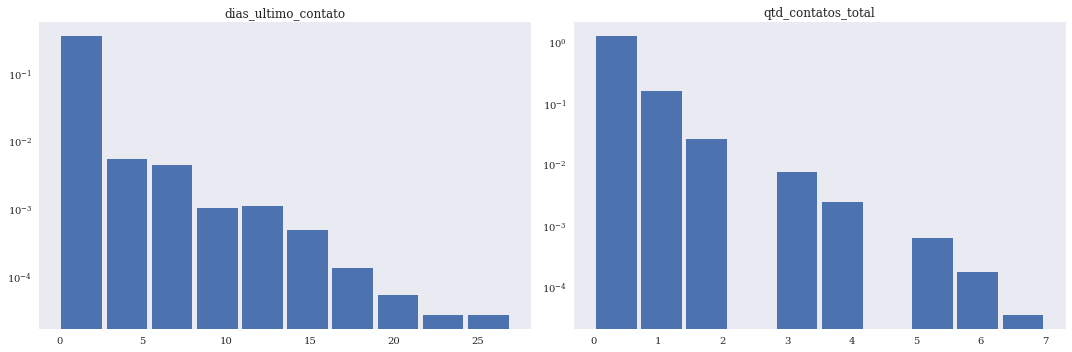

In [571]:
df_callcenter[list_col_reanalyze].hist(figsize=[15,5],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9,
                                       log=True)

#### Notas Sobre a Reanálise
- Ao simular uma aplicação de log afim de deixar as features mais próximas de uma distribuição gaussiana, houve uma grande diferença visual na distribuição.
- Para estas variáveis, será aplicado a técnica de **rescale**

#### `dias_ultimo_contato` e `qtd_contatos_total`
- Muitos dados da coluna `dias_ultimo_contato` e `qtd_contatos_total` são zeros, devido a isso é necessário adicionar uma correção para estes.
- Esta correção garante que os dados não vão tender ao infinito, até porque **log 0 = indefinido**
- O ideal é aplicar para o valor 0, **log 1 = 0** ou para dar mais peso log 2.

In [572]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

In [573]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'qtd_contatos_total')

'Skew before = 3.8313158687466706 -> Skew after = 2.125168815715544'

In [574]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'dias_ultimo_contato')

'Skew before = 7.937427748212724 -> Skew after = 5.702686547673782'

### Medidas de Dispersão

In [575]:
def show_measures_spread(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['std_deviation_pop',
            'std_deviation',
             'variance_pop',
             'variance',
             'maximum',
             'minimum'] 

    df_temp = pd.DataFrame(index=[index])
    
    print("-"*25, "MEASURES OF SPREAD", "-"*25, end='\n\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(statistics.pstdev(df[column])) # population
        list_temp.append(statistics.stdev(df[column])) # sample
        list_temp.append(statistics.pvariance(df[column])) # population
        list_temp.append(statistics.variance(df[column])) # sample
        list_temp.append(df[column].max())
        list_temp.append(df[column].min())
        
        df_temp[column] = list_temp
    
    return df_temp

In [576]:
show_measures_spread(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SPREAD -------------------------



,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
std_deviation_pop,10.4204,2.4117,0.688435,2.22747,0.0,0.497699,0.3588,0.481519,2.04096,1.41152,0.958249,0.576764,0.306171,0.344018,0.455831,0.579931,4.62781,1.73456,72.3309,0.31621
std_deviation,10.4205,2.41173,0.688443,2.22749,0.0,0.497705,0.358804,0.481525,2.04099,1.41154,0.95826,0.576771,0.306175,0.344022,0.455836,0.579938,4.62787,1.73458,72.3317,0.316214
variance_pop,108.584,5.81629,0.473942,4.9616,0.0,0.247704,0.128737,0.23186,4.16553,1.9924,0.918241,0.332656,0.0937408,0.118348,0.207782,0.33632,21.4166,3.0087,5231.75,0.0999889
variance,108.587,5.81643,0.473954,4.96172,0.0,0.24771,0.12874,0.231866,4.16563,1.99245,0.918263,0.332665,0.0937431,0.118351,0.207787,0.336328,21.4172,3.00877,5231.88,0.0999913
maximum,98.0,11.0,2.0,7.0,0.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,3.0,2.0,2.0,94.77,-26.9,5.04,5228.0,1.0
minimum,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0


### Medidas de Relação

In [577]:
df_callcenter.corr()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
idade,1.0,0.0185394,-0.116678,-0.083989,nan,-0.00168213,-0.00715303,-0.00691262,0.077167,-0.0184158,0.00756462,-0.000618639,0.0303172,0.0169755,0.0264697,0.0010428,0.129022,0.0107423,-0.0178528,0.0304162
profissao,0.0185394,1.0,-0.0046358,0.166186,nan,0.00614279,-0.00998142,0.0234699,0.0590871,0.00228476,0.0104869,-0.0172405,0.0460775,0.0432791,0.0498665,-0.0523749,0.0147387,-0.078268,-0.0887294,0.05585
estado_civil,-0.116678,-0.0046358,1.0,0.0611763,nan,0.00830497,-0.00161578,0.0435819,-0.0023657,-0.00447304,-4.60709e-05,0.0056226,0.016214,0.0301116,0.0288283,-0.0235703,-0.0508778,-0.0536961,-0.0494946,0.0256545
educacao,-0.083989,0.166186,0.0611763,1.0,nan,0.015159,0.00720015,0.0917157,0.111759,0.00924367,-0.0174342,3.07453e-06,0.0307092,0.0165262,0.0264745,-0.0752275,0.0728502,-0.0244869,-0.0272117,0.0467286
inadimplente,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
emprestimo_moradia,-0.00168213,0.00614279,0.00830497,0.015159,nan,1.0,0.0364054,0.0778541,0.0299011,-0.00871493,-0.00935084,-0.00564153,0.00713244,0.0252878,0.0234749,-0.0772169,-0.0322589,-0.0583251,-0.0457493,0.0111478
emprestimo_pessoal,-0.00715303,-0.00998142,-0.00161578,0.00720015,nan,0.0364054,1.0,0.0134273,-0.0016496,0.00180237,-0.00937613,0.00878457,-0.00163956,-0.000290599,-0.000438001,-0.00600722,-0.0136269,-0.000476971,0.00425157,-0.00451127
meio_contato,-0.00691262,0.0234699,0.0435819,0.0917157,nan,0.0778541,0.0134273,1.0,0.32436,-0.0195736,0.0537429,-0.0708433,0.109944,0.242506,0.226889,-0.590479,-0.251583,-0.400432,-0.270093,0.144813
mes,0.077167,0.0590871,-0.0023657,0.111759,nan,0.0299011,-0.0016496,0.32436,1.0,-0.00681471,-0.0290269,-0.0324462,0.0740531,0.0440697,0.060788,-0.149811,0.264119,0.162918,0.130096,0.0372256
dia_da_semana,-0.0184158,0.00228476,-0.00447304,0.00924367,nan,-0.00871493,0.00180237,-0.0195736,-0.00681471,1.0,-0.0159011,0.00229629,-0.00696747,0.00745653,0.0032752,-0.00453527,5.78935e-05,-0.00530249,-0.000671228,0.00995848


#### Análise Gráfica

In [578]:
def plot_correlation(df):
    plt.figure(figsize = (25,20), facecolor=figure_facecolor, dpi=figure_dpi)
    plt.title('Correlation Features', y=1.00, size=28)

    correlation = df.corr(method='pearson')
    
    correlation_img = sns.heatmap(correlation, 
                                    annot=True, 
                                    cbar=True, 
                                    linecolor='white',
                                    linewidths=.1,
                                    cmap="RdYlGn")
    return correlation_img

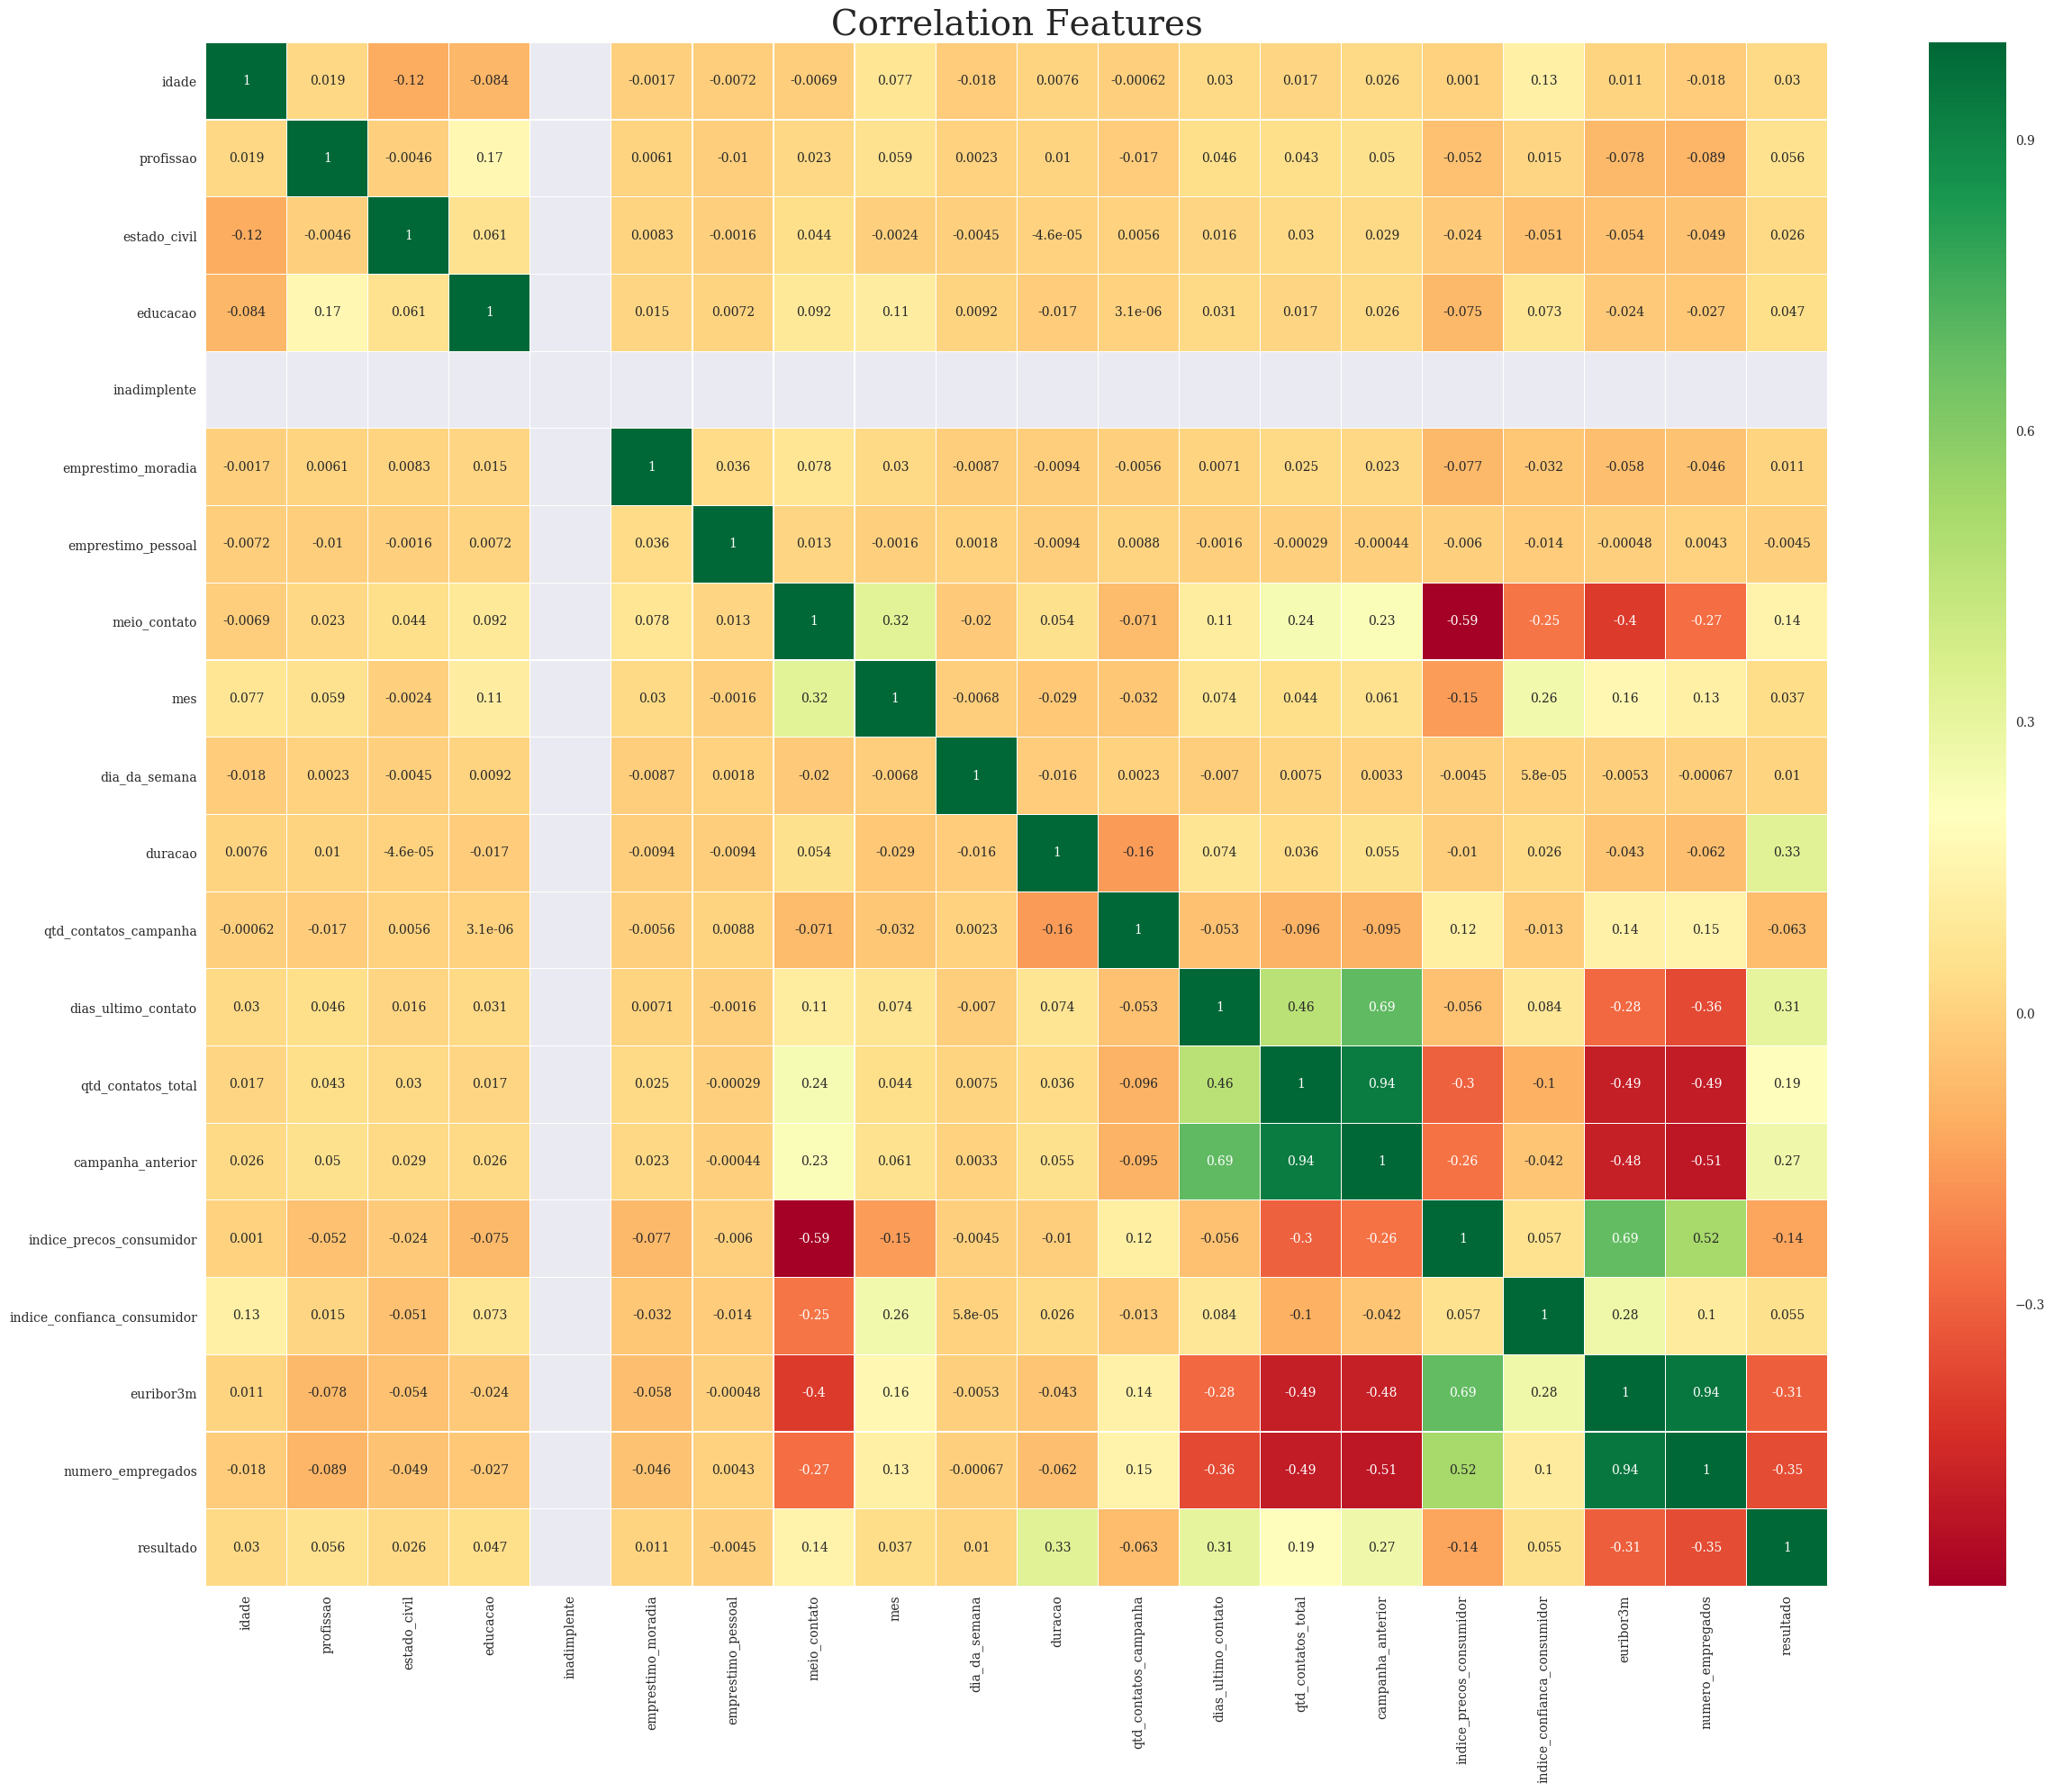

In [579]:
correlation_img = plot_correlation(df_callcenter)

- A coluna `inadimplente` esta vazia pois sempre apresenta o mesmo valor.

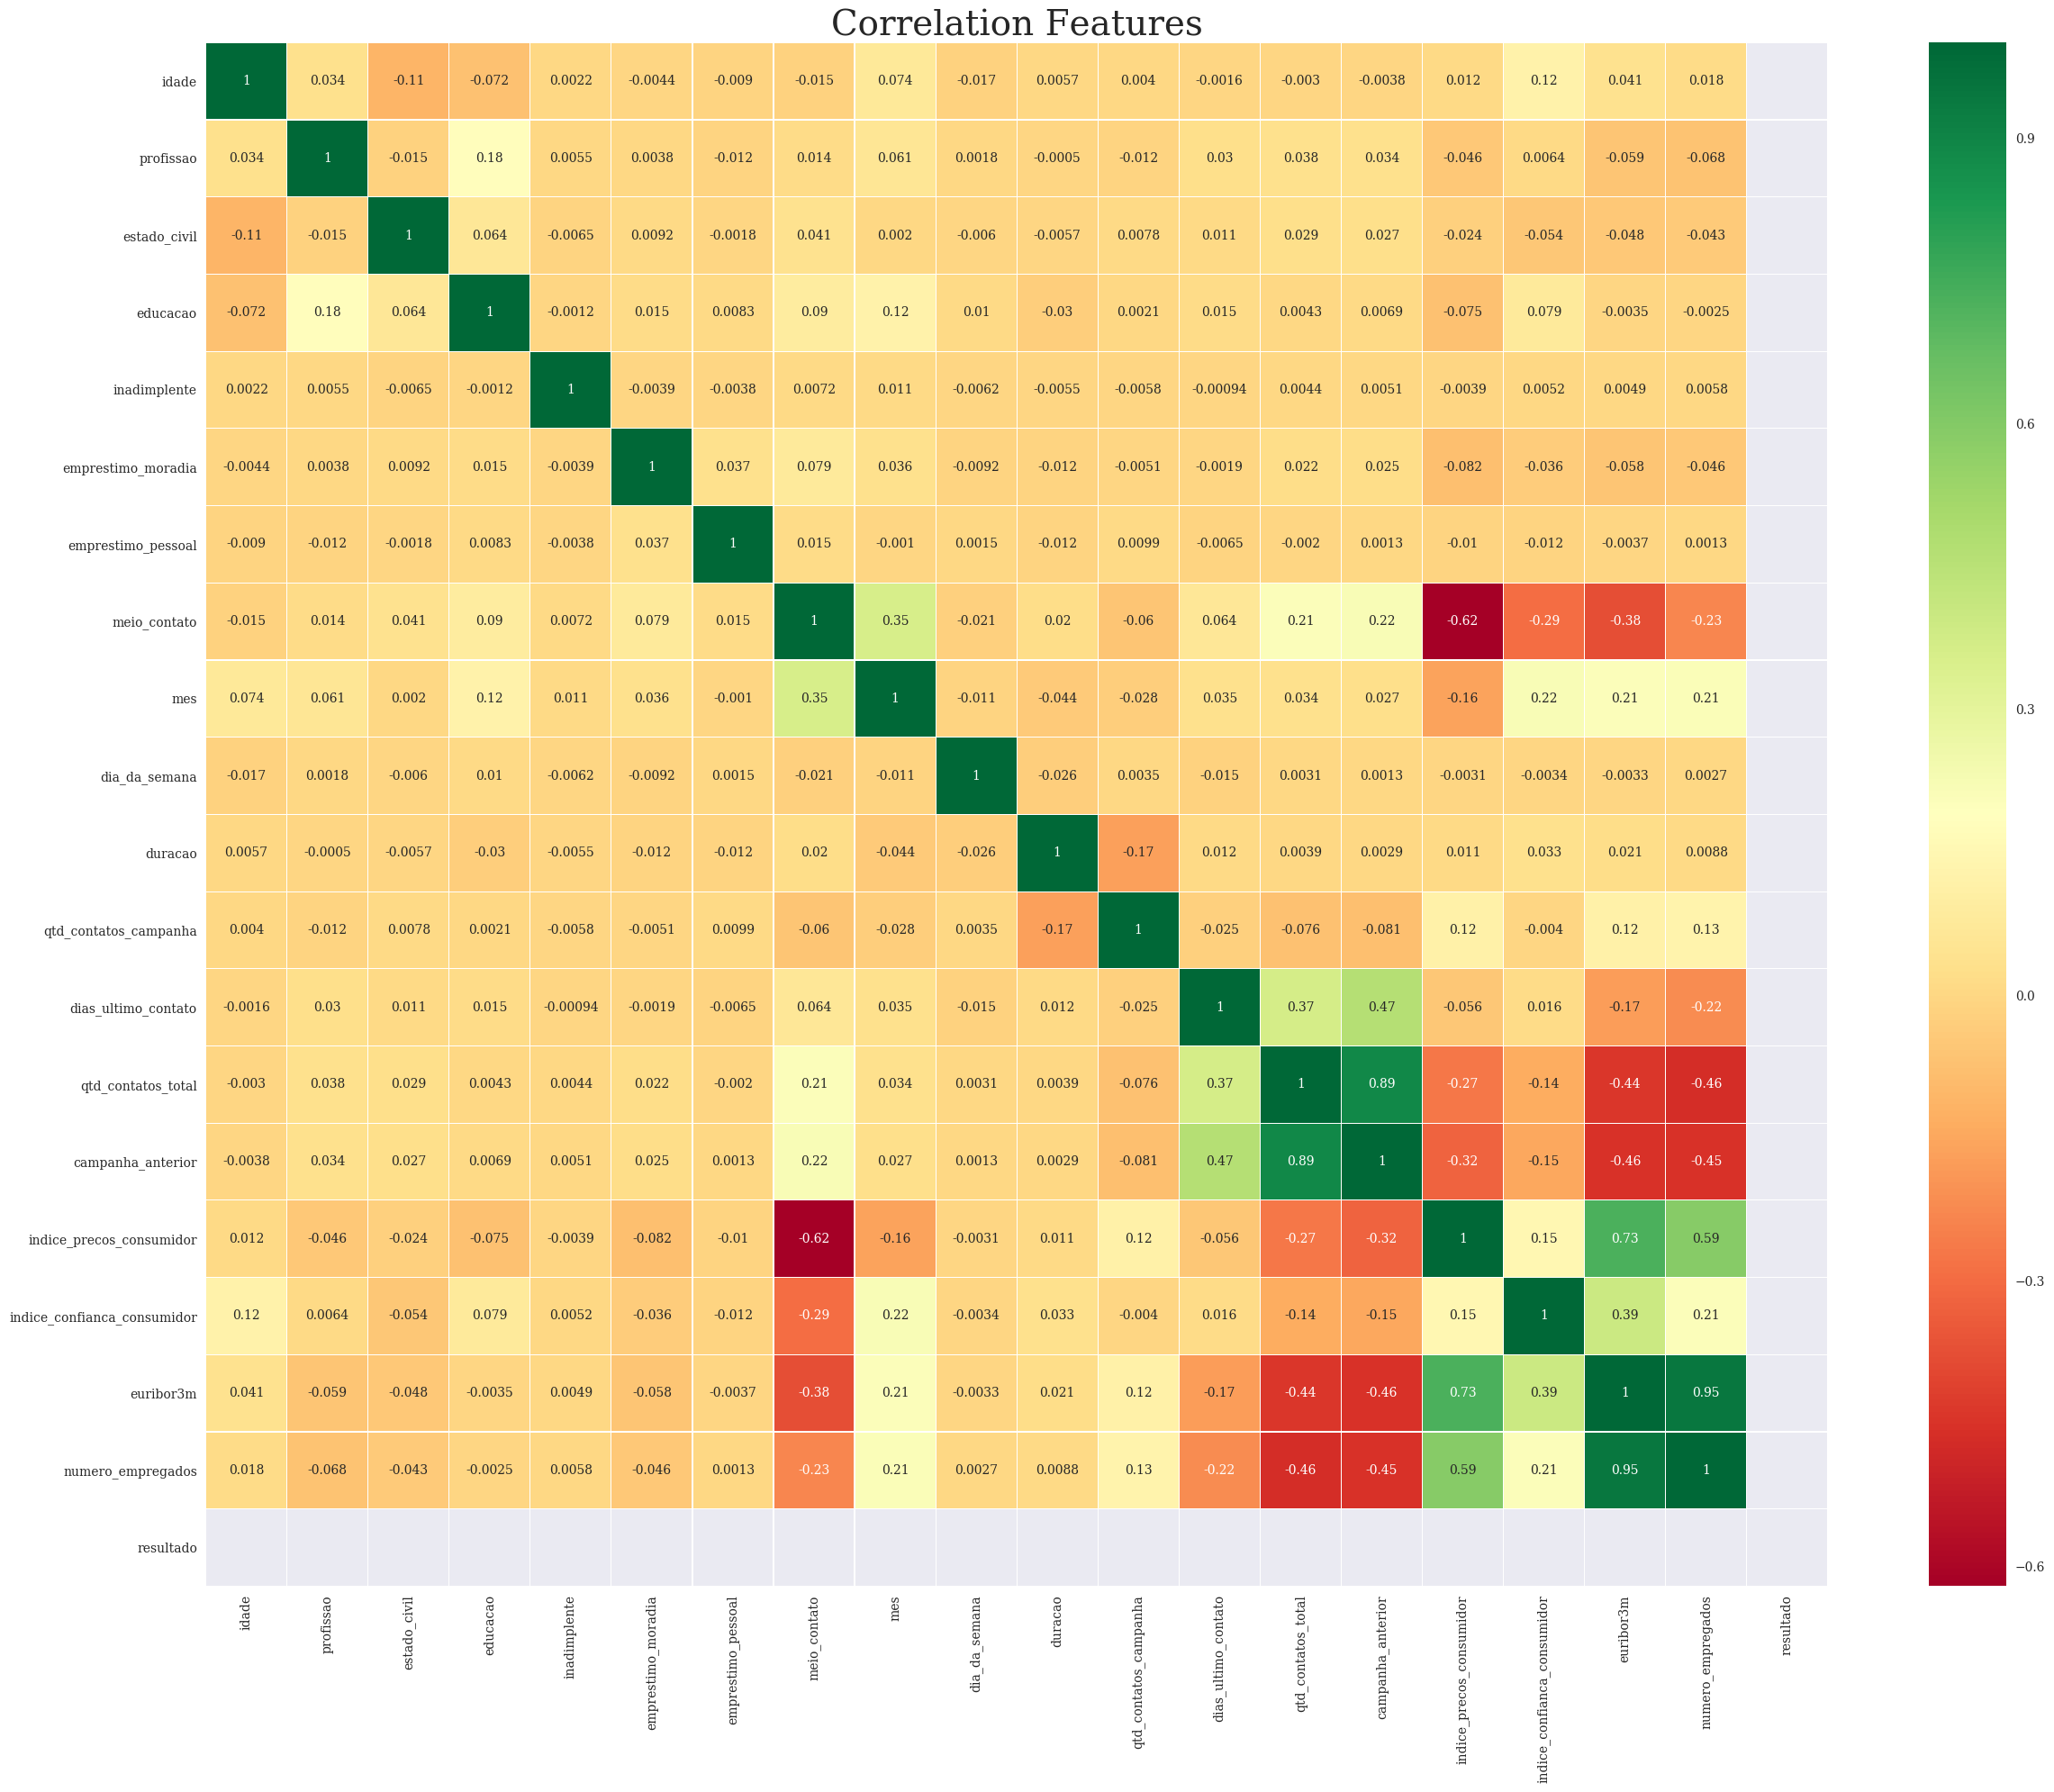

In [471]:
correlation_resultado_0_img = plot_correlation(df_resultado_0)

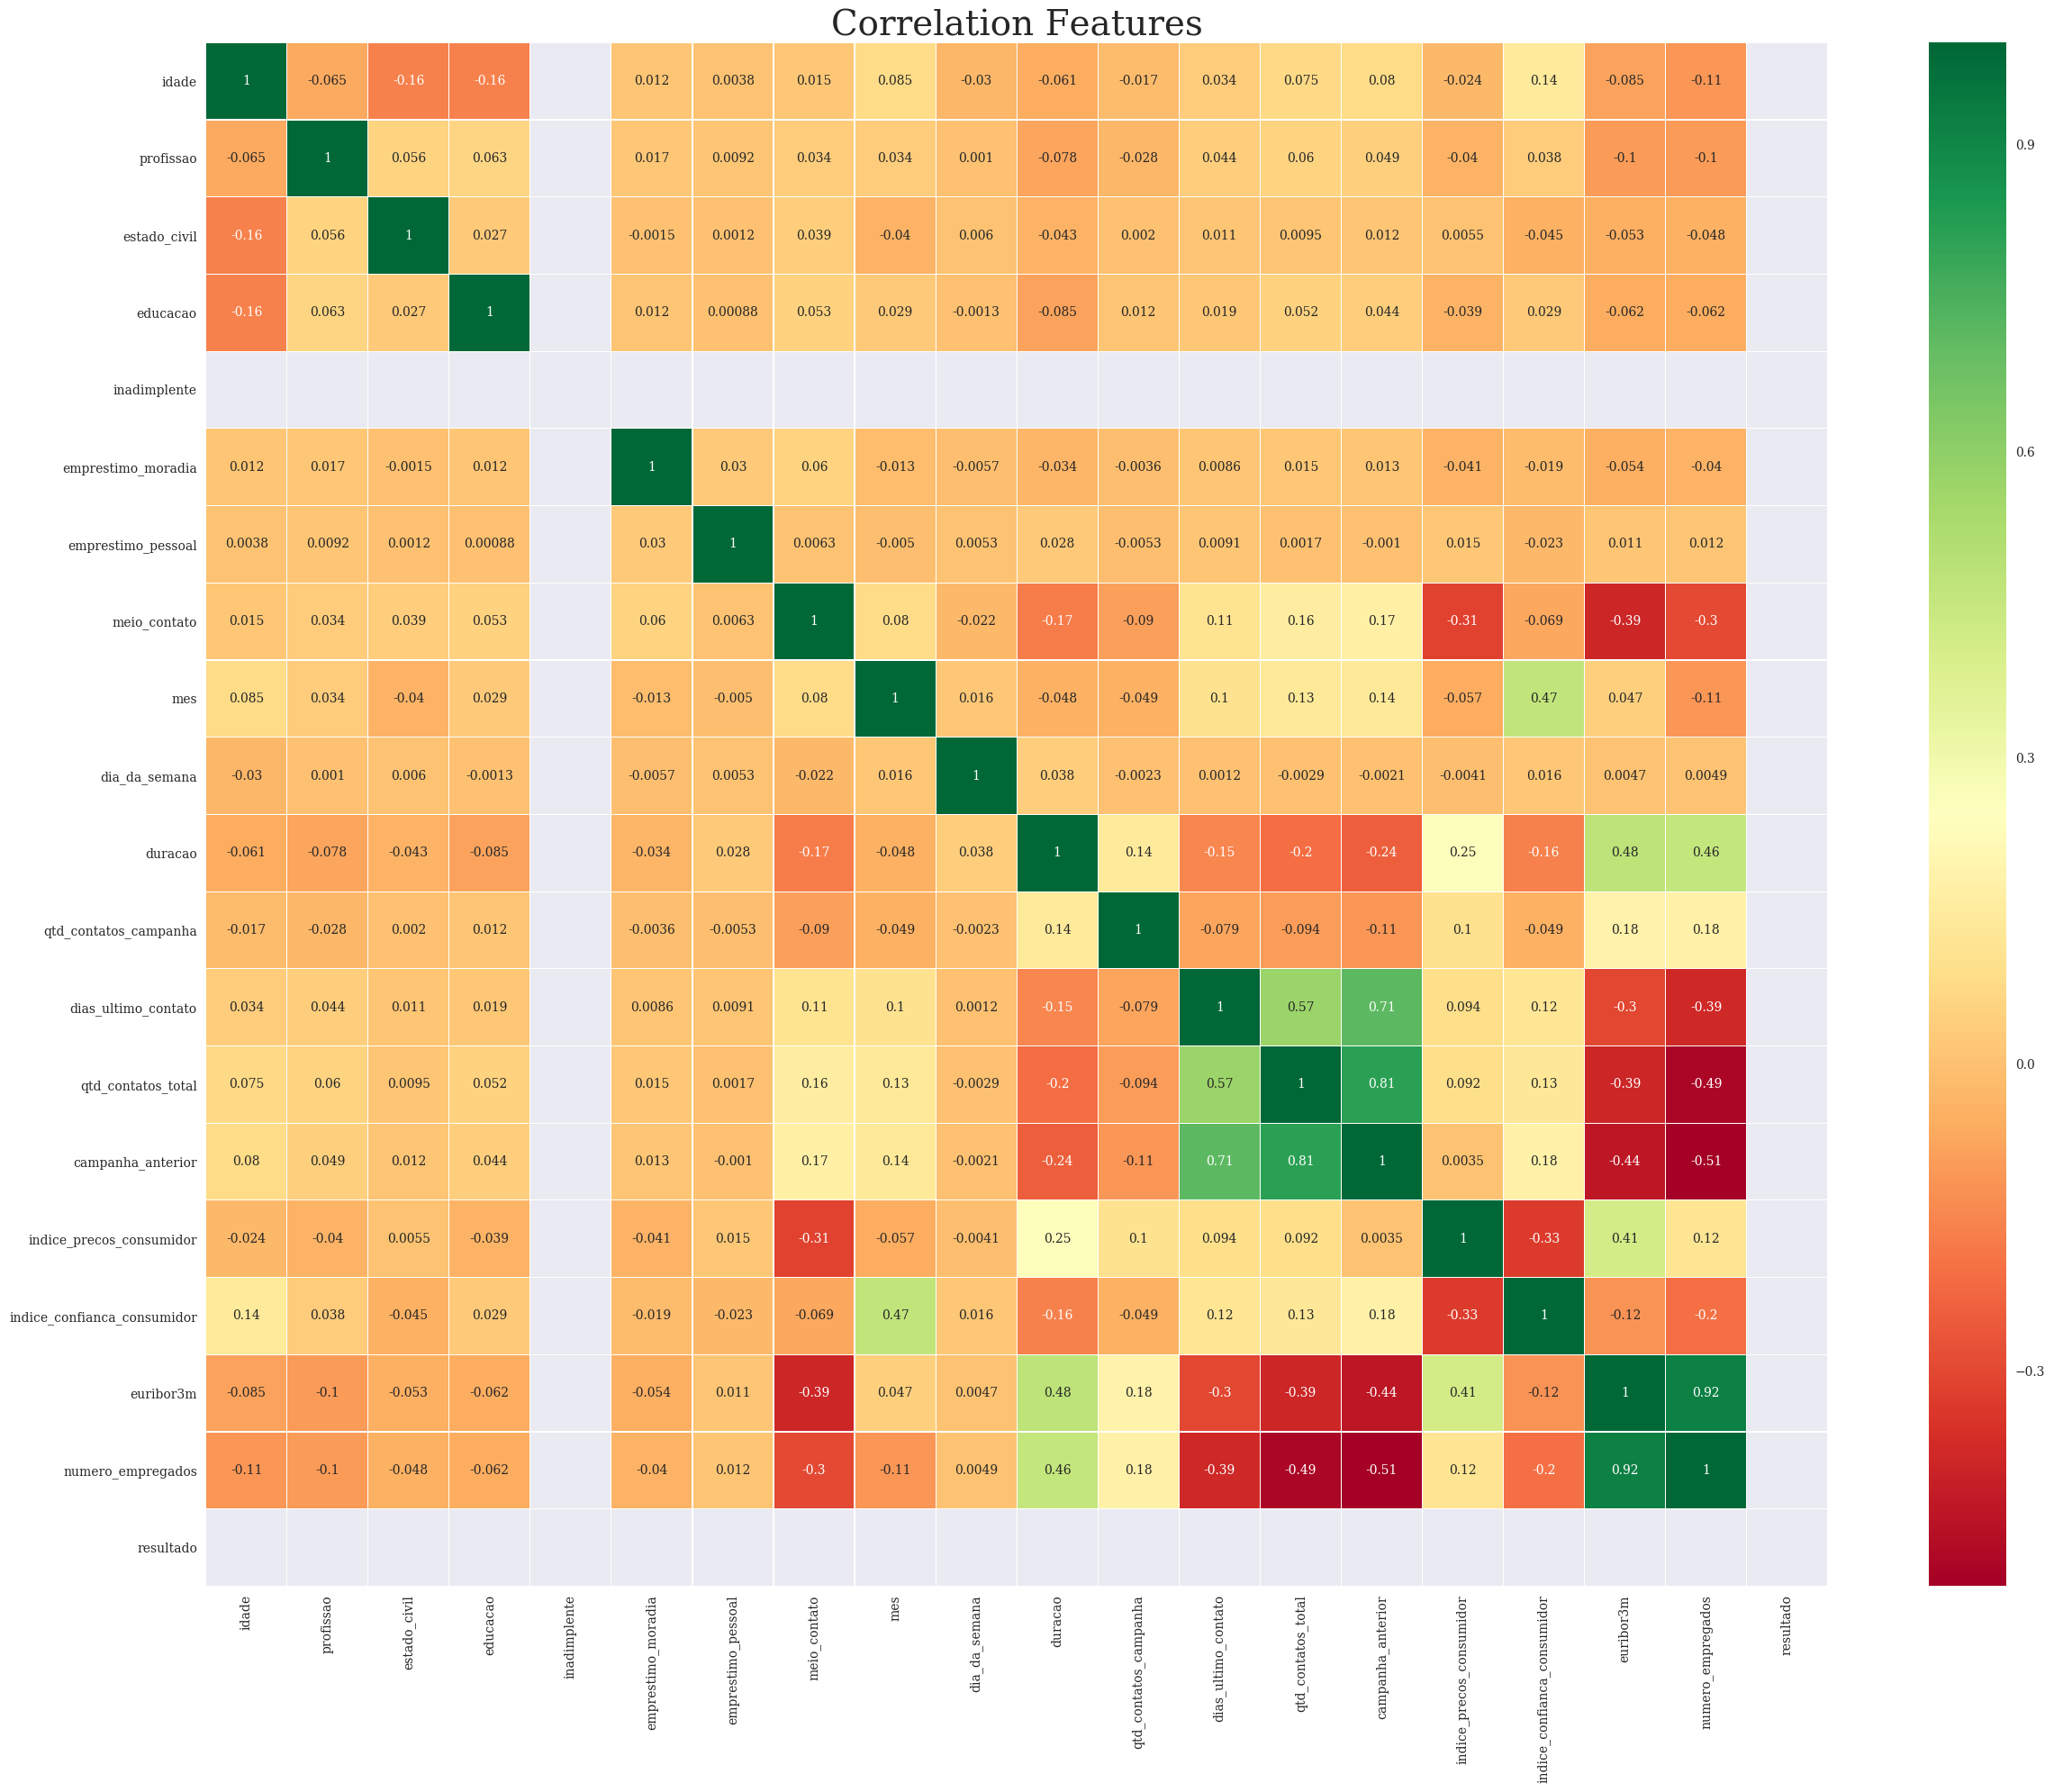

In [472]:
correlation_resultado_1_img = plot_correlation(df_resultado_1)

#### Nota
- A imagem contem muitos detalhes. Melhor analisar fora do jupyter notebook

In [473]:
# savefig()

def save_image(img: 'matplotlib',
               name: str,
               path: str = 'reports/images/'):
    
    fig = img.get_figure()
    fig.savefig(f"reports/images/{name}.png")
    
    return f"Image {name} saved."

In [474]:
save_image(img=correlation_img, name='correlation')

'Image correlation saved.'

In [475]:
save_image(img=correlation_resultado_0_img, name='correlation_resultado_0')

'Image correlation_resultado_0 saved.'

In [476]:
save_image(img=correlation_resultado_1_img, name='correlation_resultado_1')

'Image correlation_resultado_1 saved.'

#### Gráficos Scatter

- Vou imprimir junções de gráficos scatter com os grupos de features, conforme fornecido no arquivo `callcenter_descricao.txt`

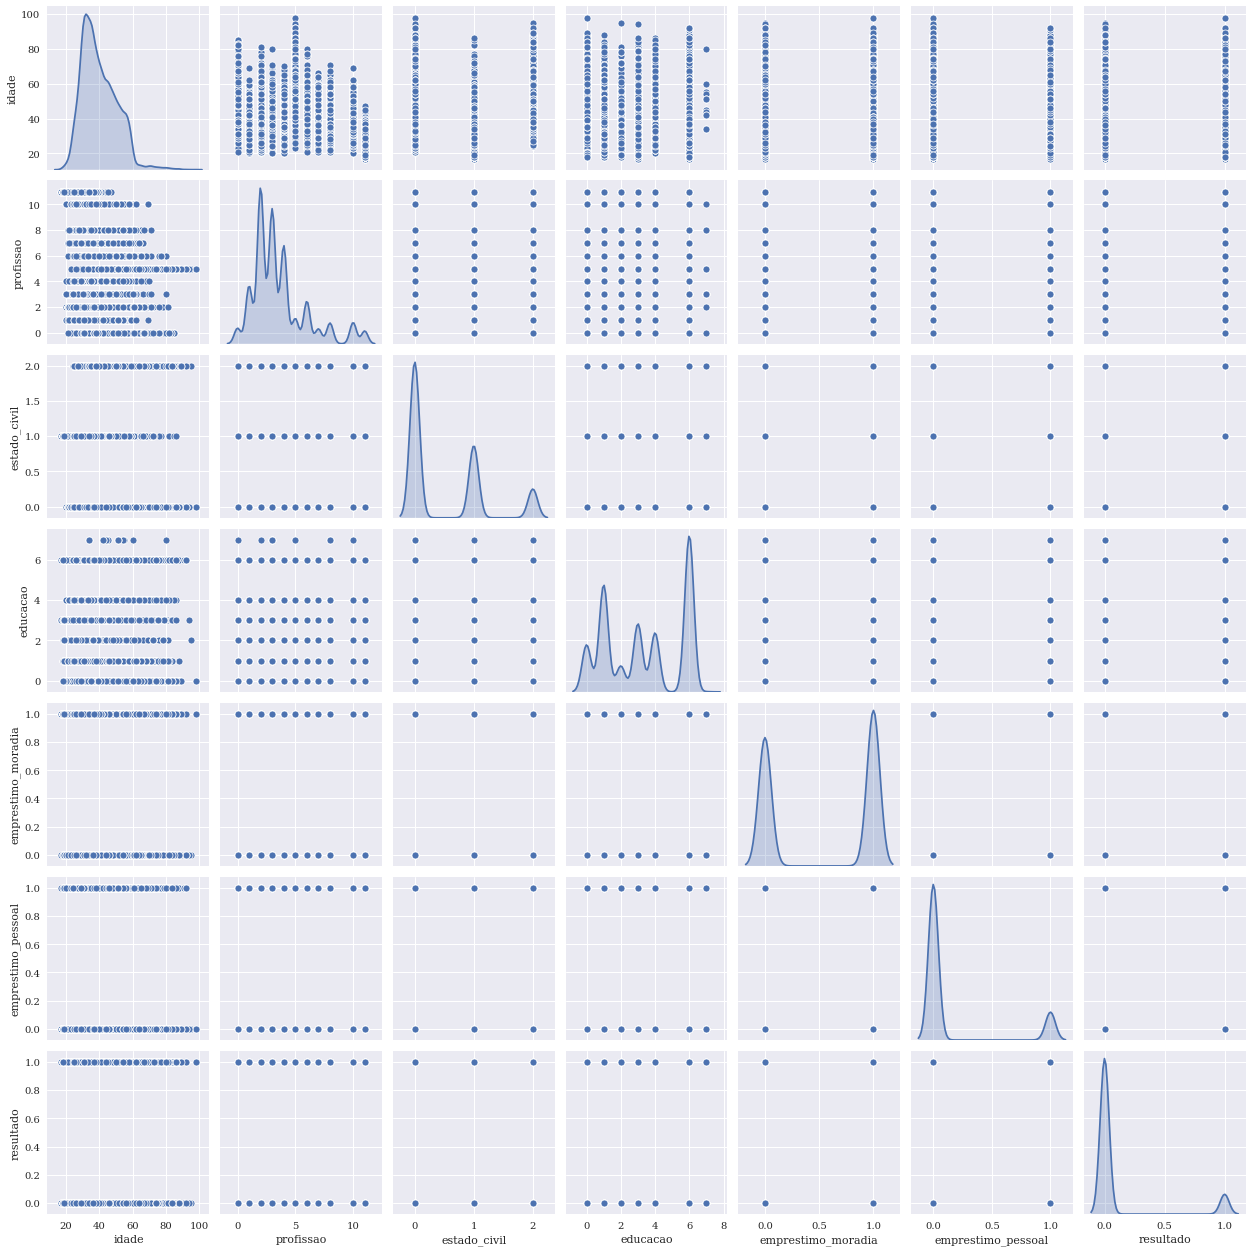

In [478]:
corr_client_data = sns.pairplot(df_callcenter[list_numerical_col], 
                                vars=['idade',
                                      'profissao',
                                      'estado_civil',
                                      'educacao',
                                      'emprestimo_moradia',
                                      'emprestimo_pessoal',
                                      'resultado'],
                                 kind = 'scatter',
                                 diag_kind='kde')
display(corr_client_data)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

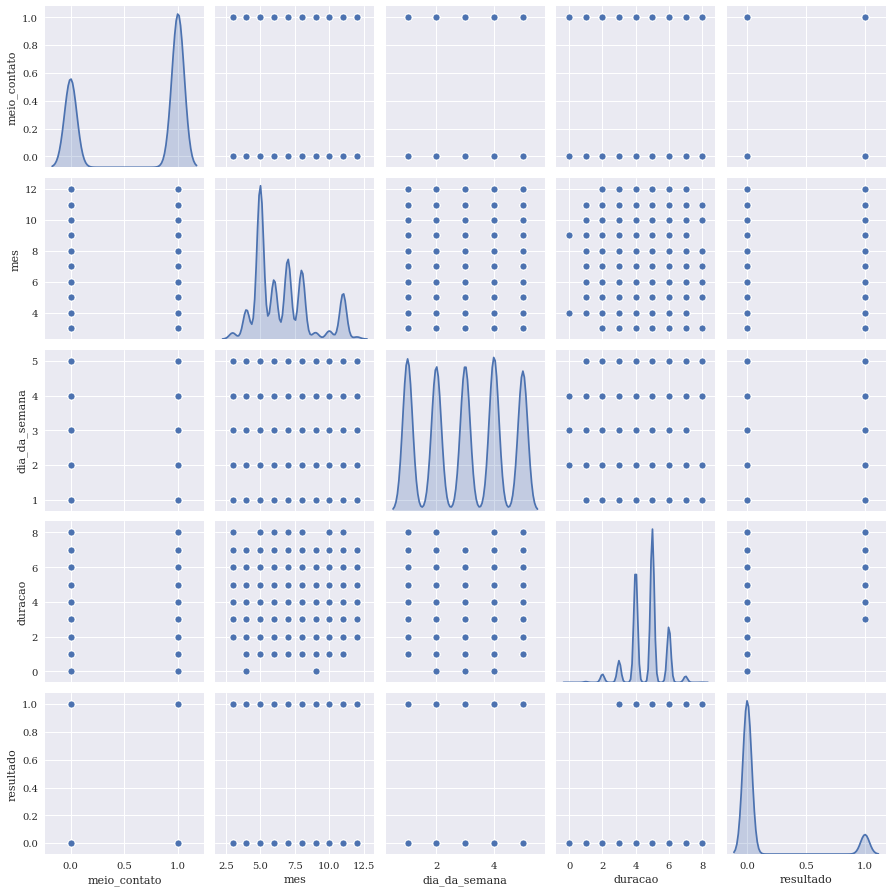

In [479]:
corr_last_contact = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['meio_contato',
                                             'mes',
                                             'dia_da_semana',
                                             'duracao',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_last_contact)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

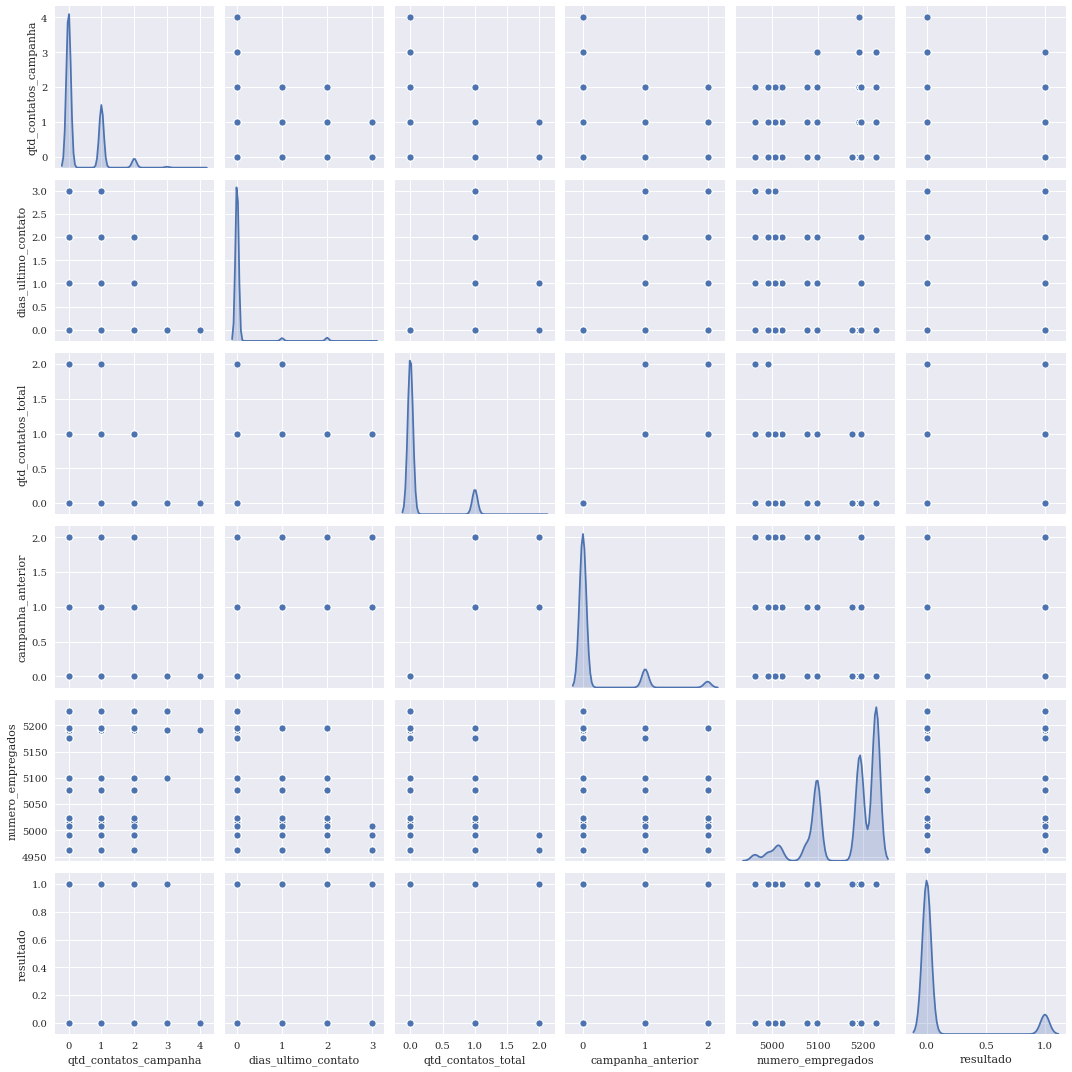

In [480]:
corr_other_var = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['qtd_contatos_campanha',
                                             'dias_ultimo_contato',
                                             'qtd_contatos_total',
                                             'campanha_anterior',
                                             'numero_empregados',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_other_var)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

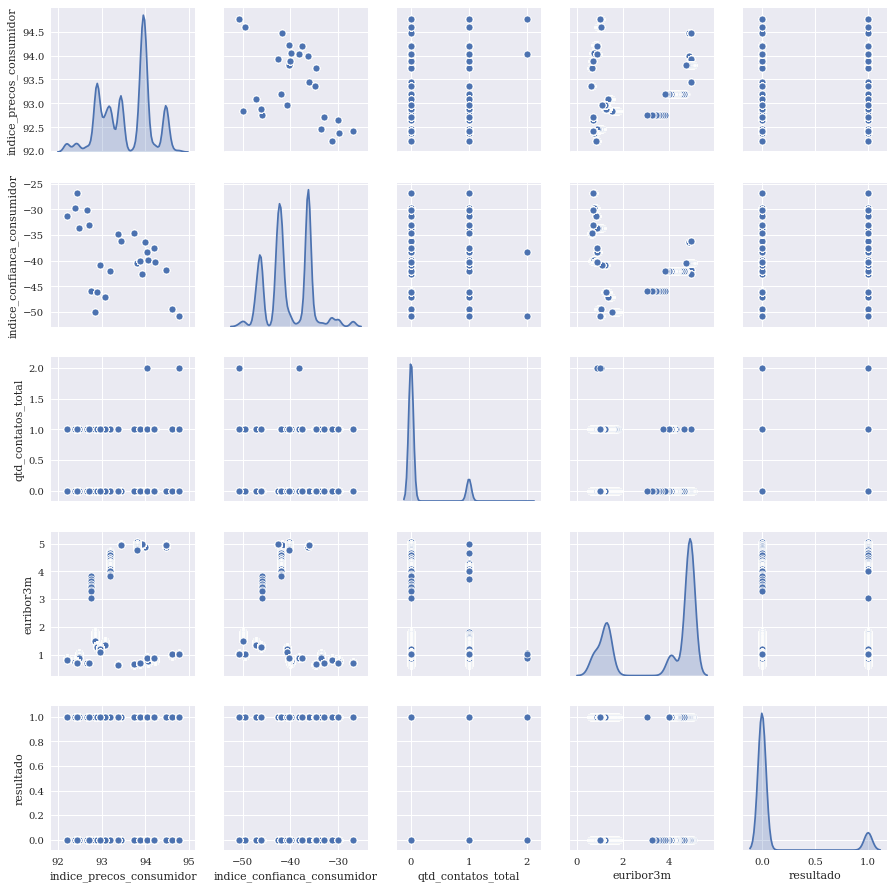

In [481]:
corr_indexes = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_precos_consumidor',
                                             'indice_confianca_consumidor',
                                             'qtd_contatos_total',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_indexes)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

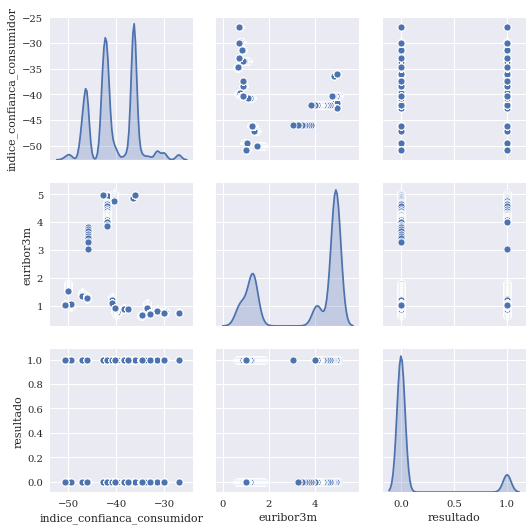

In [482]:
corr_until_inadimplente = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_confianca_consumidor',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_until_inadimplente)

#### Melhores Correlações

In [580]:
def top_corr(df: 'dataframe', list_col: 'list', n_corr: int = 20, corr_method: str = 'pearson') -> 'Series':
    corr_top_list = df[list_col].corr(method=corr_method).abs()

    s = corr_top_list.unstack()
    sortedSeries = s.sort_values(kind="quicksort",ascending=False)
    best_correlation = sortedSeries[sortedSeries != 1.0][0:n_corr]

    print("-"*25, "TOP CORRELATED IN PAIRS", "-"*25, end='\n\n')
    return best_correlation

In [581]:
top_corr(df=df_callcenter,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



numero_empregados         euribor3m                  0.944926
euribor3m                 numero_empregados          0.944926
campanha_anterior         qtd_contatos_total         0.937346
qtd_contatos_total        campanha_anterior          0.937346
campanha_anterior         dias_ultimo_contato        0.691051
dias_ultimo_contato       campanha_anterior          0.691051
indice_precos_consumidor  euribor3m                  0.686919
euribor3m                 indice_precos_consumidor   0.686919
meio_contato              indice_precos_consumidor   0.590479
indice_precos_consumidor  meio_contato               0.590479
numero_empregados         indice_precos_consumidor   0.521267
indice_precos_consumidor  numero_empregados          0.521267
campanha_anterior         numero_empregados          0.510169
numero_empregados         campanha_anterior          0.510169
qtd_contatos_total        numero_empregados          0.493898
numero_empregados         qtd_contatos_total         0.493898
euribor3

#### Notas
- Entre as 20 melhores correlações, não há algum caso de correlação das features com a variável target (`resultado`)

In [582]:
top_corr(df=df_resultado_0,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



numero_empregados         euribor3m                  0.947091
euribor3m                 numero_empregados          0.947091
campanha_anterior         qtd_contatos_total          0.88906
qtd_contatos_total        campanha_anterior           0.88906
euribor3m                 indice_precos_consumidor   0.729543
indice_precos_consumidor  euribor3m                  0.729543
meio_contato              indice_precos_consumidor   0.620426
indice_precos_consumidor  meio_contato               0.620426
                          numero_empregados          0.593404
numero_empregados         indice_precos_consumidor   0.593404
campanha_anterior         dias_ultimo_contato         0.46764
dias_ultimo_contato       campanha_anterior           0.46764
numero_empregados         qtd_contatos_total         0.463939
qtd_contatos_total        numero_empregados          0.463939
euribor3m                 campanha_anterior          0.455025
campanha_anterior         euribor3m                  0.455025
numero_e

In [583]:
top_corr(df=df_resultado_1,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



euribor3m                    numero_empregados             0.921716
numero_empregados            euribor3m                     0.921716
qtd_contatos_total           campanha_anterior             0.811377
campanha_anterior            qtd_contatos_total            0.811377
dias_ultimo_contato          campanha_anterior             0.711856
campanha_anterior            dias_ultimo_contato           0.711856
dias_ultimo_contato          qtd_contatos_total            0.574737
qtd_contatos_total           dias_ultimo_contato           0.574737
numero_empregados            campanha_anterior             0.510864
campanha_anterior            numero_empregados             0.510864
numero_empregados            qtd_contatos_total            0.488669
qtd_contatos_total           numero_empregados             0.488669
duracao                      euribor3m                     0.480573
euribor3m                    duracao                       0.480573
indice_confianca_consumidor  mes                

#### Notas
- Algo interessante é que `dias_ultimo_contato` e `campanha_anterior` aumentam significativamente de correlação quando o `resultado == 1`.

#### Sem Correlações

- correlation = 0% com a feature `resultado`
- São feature totalmente independentes

In [590]:
def get_without_correlation(df, list_col, target_col):
    corr_list = df[list_col].corr().abs()

    s = corr_list.unstack()
    sortedSeries = s\
                    .sort_values(kind="quicksort",ascending=True)\
                        .get(target_col)

    without_correlation = sortedSeries[sortedSeries < 0.01][0:-1]

    print("-"*25, "WITHOUT CORRELATED WITH TARGET", "-"*25, end='\n\n')
    print(without_correlation)
    return without_correlation.index.tolist()

In [591]:
def remove_without_corr(df: 'dataframe', list_without_corr: list) -> int:
    print(f'Columns before = {df.shape[1]}')

    for column in list_without_corr:
        del df[column]
    
    return print(f"Columns after = {df.shape[1]}")

In [592]:
list_without_corr = get_without_correlation(df = df_callcenter,
                                            list_col = list_numerical_col,
                                            target_col = 'resultado')

------------------------- WITHOUT CORRELATED WITH TARGET -------------------------

emprestimo_pessoal   0.00451127
dtype: float64


In [593]:
remove_without_corr(df_callcenter, list_without_corr)

Columns before = 20
Columns after = 19


In [594]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## Feature Importance
Vou utilizar uma decision tree para fazer uma feature selection.<br/>
A partir disso, vou ranquear as features mais importantes.

**OBS:** não necessariamente utilizarei um modelo de random forest. Neste momento só estou usando para descobrir quais são as variáveis de maior peso no modelo.

In [595]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """
    Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
    """
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sorted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [596]:
# create model

rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [597]:
# trainning model

rf.fit(df_callcenter[list_without_target_col], df_callcenter['resultado'])
features = df_callcenter[list_without_target_col].columns.values

print("---Traing Done---")

---Traing Done---


In [598]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print feature_importance in the rf randomForest
display(feature_importance)

,feature,importance
0,duracao,0.308552
1,numero_empregados,0.179875
2,euribor3m,0.140561
3,dias_ultimo_contato,0.0765891
4,campanha_anterior,0.0605792
5,indice_confianca_consumidor,0.0556137
6,indice_precos_consumidor,0.0509327
7,mes,0.028898
8,idade,0.0276352
9,qtd_contatos_total,0.0181571


[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, "Name's Variable"),
 Text(0.5, 1.0, 'Variable Importances')]

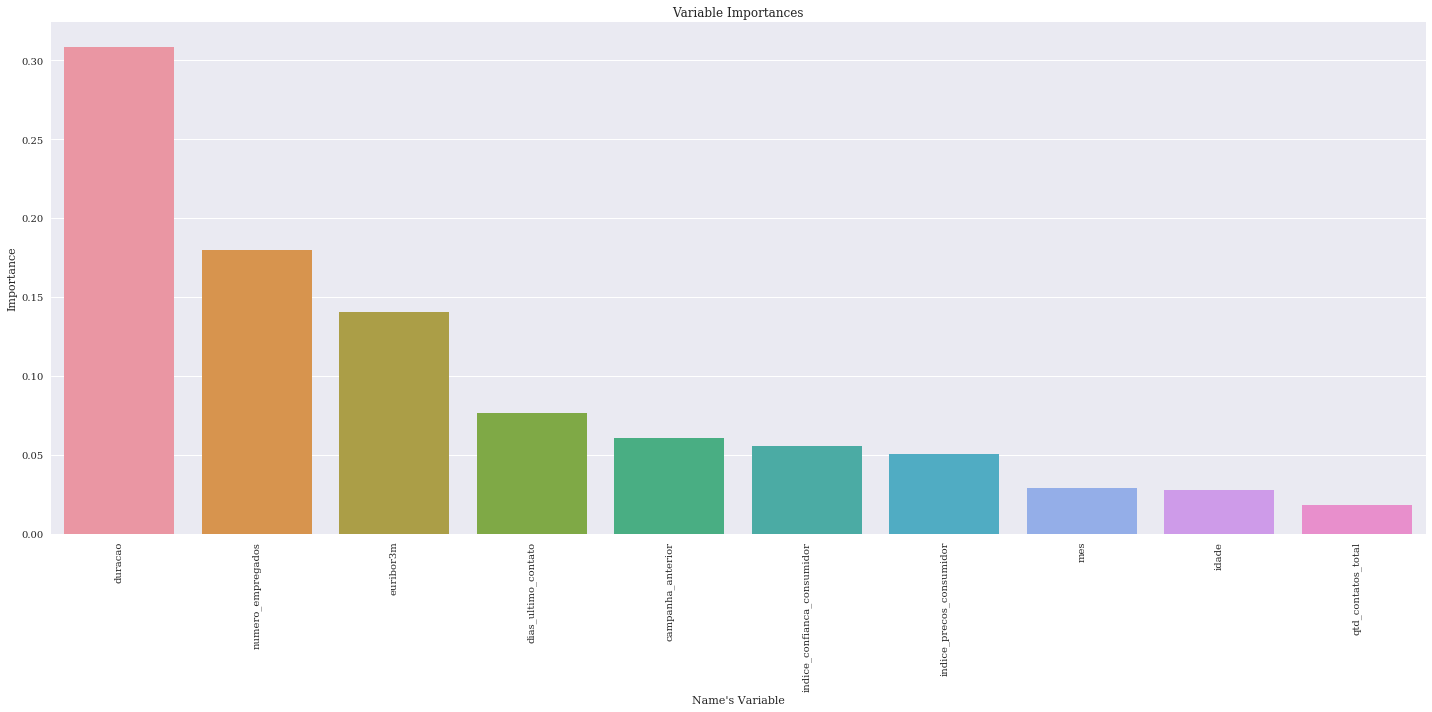

In [599]:
fig,ax = plt.subplots()
plt.xticks(rotation='vertical')

fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel="Name's Variable",
       ylabel='Importance',
       title="Variable Importances")

#### Eliminação de Feature Sem Importância

Ao eliminar features que não tem importância para o modelo fará com que o restante das features fiqeum mais ortogonais e diminuirá o ruído.

In [600]:
def get_without_importance(df_feature_importance: 'dataframe') -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.005)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    print("-"*25, "FEATURE WITHOUT IMPORTANCE", "-"*25, end='\n\n')
    print(df_temp)
    return list_drop_col

In [601]:
def remove_without_importace(df: 'dataframe', list_without_imp: list) -> int:
    print(f'Columns before = {df.shape[1]}')
    
    for column in list_without_imp:
        del df[column]
        
    return print(f"Columns after = {df.shape[1]}")

In [602]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

remove_without_importace(df = df_callcenter,
                        list_without_imp = list_without_importance)

------------------------- FEATURE WITHOUT IMPORTANCE -------------------------

                  feature  importance
14           estado_civil  0.00368908
15  qtd_contatos_campanha  0.00367496
16     emprestimo_moradia   0.0028366
17           inadimplente         0.0
Columns before = 19
Columns after = 15


---

### Armazenamento dos Dados Limpos

In [603]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [604]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_clenning.csv')

'Data storage!'